<a href="https://colab.research.google.com/github/kazadingoie/hackbio-biocoding-internship/blob/main/microbiology_portion_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

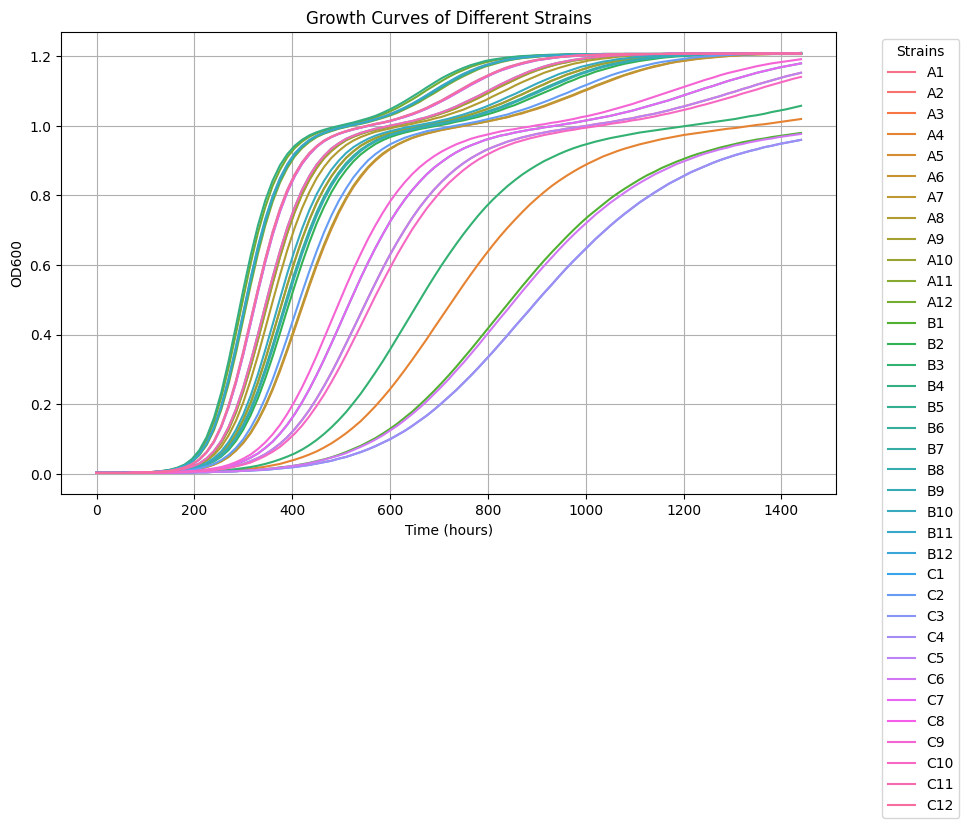

<ipython-input-3-8ab9cabf6b49>:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  carrying_times = df_long.groupby("Strain").apply(carrying_capacity_time).reset_index()


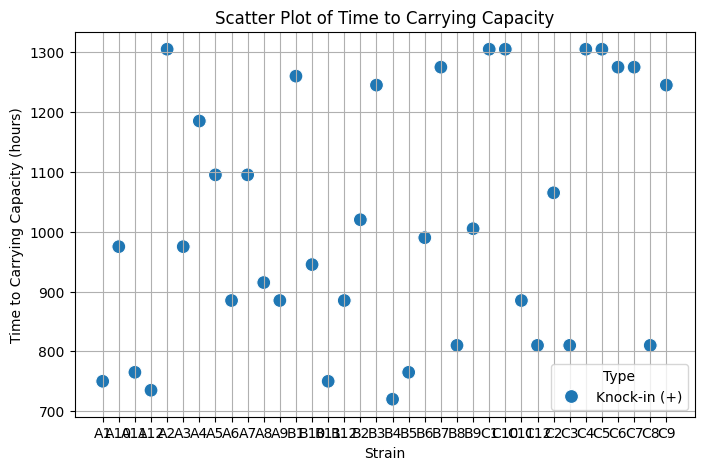

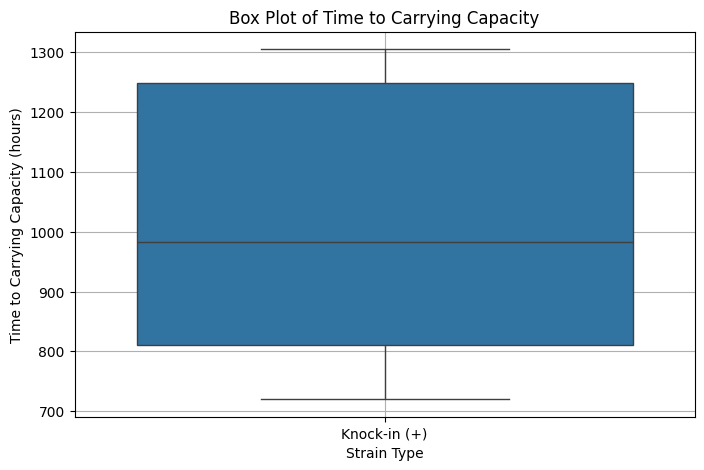

Knock-out sample size: 0
Knock-in sample size: 36
T-test Statistic: nan
P-value: nan
There is NO significant difference in carrying capacity time between knock-out and knock-in strains.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind

# Corrected data source URL (using forward slashes)
data_source = "https://raw.githubusercontent.com/HackBio-Internship/2025_project_collection/refs/heads/main/Python/Dataset/mcgc.tsv"
df = pd.read_csv(data_source, sep="\t")  # ensures tab separation

# Reshape data for plotting
df_long = df.melt(id_vars=["time"], var_name="Strain", value_name="OD600")

# Plot all the growth curves of OD600 vs Time for the different strains
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_long, x="time", y="OD600", hue="Strain")
plt.xlabel("Time (hours)")
plt.ylabel("OD600")
plt.title("Growth Curves of Different Strains")
plt.legend(title="Strains", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()

# Function to determine the time to reach carrying capacity
def carrying_capacity_time(data):
    max_OD = data["OD600"].max()
    threshold = 0.95 * max_OD
    time_reached = data[data["OD600"] >= threshold]["time"].min()
    return time_reached

# Compute the time to carrying capacity for each strain
carrying_times = df_long.groupby("Strain").apply(carrying_capacity_time).reset_index()
carrying_times.columns = ["Strain", "CarryingTime"]

# Add "Type" column based on strain names
carrying_times["Type"] = carrying_times["Strain"].apply(lambda x: "Knock-out (-)" if "-" in x else "Knock-in (+)")

# Generate a scatter plot of the time to reach carrying capacity
plt.figure(figsize=(8, 5))
sns.scatterplot(data=carrying_times, x="Strain", y="CarryingTime", hue="Type", s=100)
plt.xlabel("Strain")
plt.ylabel("Time to Carrying Capacity (hours)")
plt.title("Scatter Plot of Time to Carrying Capacity")
plt.legend(title="Type")
plt.grid(True)
plt.show()

# Generate a box plot of the time to reach carrying capacity
plt.figure(figsize=(8, 5))
sns.boxplot(data=carrying_times, x="Type", y="CarryingTime", hue="Type")
plt.xlabel("Strain Type")
plt.ylabel("Time to Carrying Capacity (hours)")
plt.title("Box Plot of Time to Carrying Capacity")
plt.grid(True)
plt.show()

# Statistical T-test for knock-out vs. knock-in strains
knockout_times = carrying_times[carrying_times["Type"] == "Knock-out (-)"]["CarryingTime"]
knockin_times = carrying_times[carrying_times["Type"] == "Knock-in (+)"]["CarryingTime"]

# Check group sizes for debugging
print("Knock-out sample size:", knockout_times.shape[0])
print("Knock-in sample size:", knockin_times.shape[0])

# Perform independent t-test (note: if one group has too few samples, the result may be NaN)
t_stat, p_value = ttest_ind(knockout_times, knockin_times, equal_var=False)

# Print t-test results
print(f"T-test Statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in carrying capacity time between knock-out and knock-in strains.")
else:
    print("There is NO significant difference in carrying capacity time between knock-out and knock-in strains.")
